#  Raw Line Graphs: Analysis of Peer Groups over Time

In this notebook, you will find developmental line graphs for various peer groups on three key metrics: **Mean Length of Sentence (MLS)**, **CN_C** (comlex nominals per clause), and **ErrorToWordRatio**. These graphs track each group's progress across eight treatments, providing insights into writing fluency, complexity, and accuracy.

## Specific Graphs Worth Looking At:

1. **Figure 1 - MLS for Group 1 (Arin and Engin)**:  
   This graph shows a consistent upward trend in sentence length, indicating steady improvement in writing fluency.

2. **Figure 2 - CN_C for Group 1 (Arin and Engin)**:  
   A notable increase in CN/C can be observed here, making this group one of the stronger examples of syntactic development.

3. **Figure 6 - ErrorToWordRatio for Group 1 (Aysen and Sinem)**:  
   This graph shows a significant decline in error rates, highlighting this group’s improvement in grammatical accuracy.

4. **Figure 15 - ErrorToWordRatio for Group 1 (Elanur and Ece Berfu)**:  
   The stability in error ratio contrasts with other groups, suggesting consistent accuracy but limited progress in reducing mistakes.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.signal import detrend
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list


(10, 10)

In [11]:
# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list


(10, 10)

In [12]:
# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS, CN/C, ErrorToWordRatio
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Assign individual detrended and normalized dataframes for G1
g1_arin_engin_df_detrended = g1_dataframes_detrended[0]
g1_aysen_sinem_df_detrended = g1_dataframes_detrended[1]
g1_cello_ezgi_df_detrended = g1_dataframes_detrended[2]
g1_dilara_sila_df_detrended = g1_dataframes_detrended[3]
g1_elanur_eceberfu_df_detrended = g1_dataframes_detrended[4]
g1_helin_senay_df_detrended = g1_dataframes_detrended[5]
g1_nupelda_eda_df_detrended = g1_dataframes_detrended[6]
g1_oyku_cahit_df_detrended = g1_dataframes_detrended[7]
g1_selin_zahide_df_detrended = g1_dataframes_detrended[8]
g1_umay_kubra_df_detrended = g1_dataframes_detrended[9]

# Assign individual detrended and normalized dataframes for G2
g2_abidin_osman_df_detrended = g2_dataframes_detrended[0]
g2_aleynaceren_df_detrended = g2_dataframes_detrended[1]
g2_ayse_halime_df_detrended = g2_dataframes_detrended[2]
g2_beyza_umur_df_detrended = g2_dataframes_detrended[3]
g2_ceren_mihriban_df_detrended = g2_dataframes_detrended[4]
g2_damla_sumeyye_df_detrended = g2_dataframes_detrended[5]
g2_fadime_sura_df_detrended = g2_dataframes_detrended[6]
g2_fatma_eren_df_detrended = g2_dataframes_detrended[7]
g2_songul_esma_df_detrended = g2_dataframes_detrended[8]
g2_zeynep_elif_df_detrended = g2_dataframes_detrended[9]

# Verify detrended and normalized dataframes are created
len(g1_dataframes_detrended), len(g2_dataframes_detrended)  # Should return 10 for each list


(10, 10)

Figure 1. Developmental Line Graph of MLS for Group 2 - Abidin and Osman


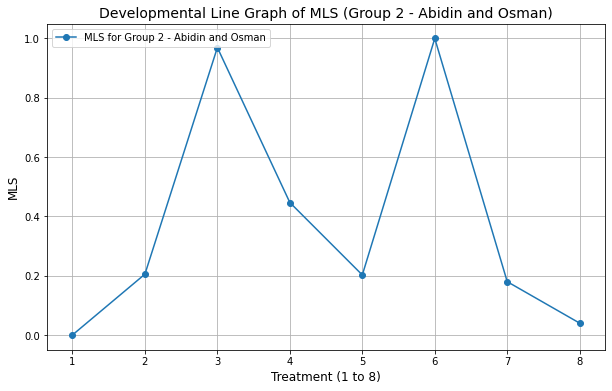

Figure 2. Developmental Line Graph of CN_C for Group 2 - Abidin and Osman


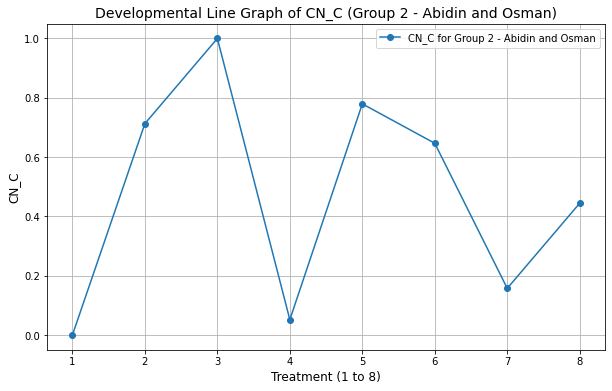

Figure 3. Developmental Line Graph of ErrorToWordRatio for Group 2 - Abidin and Osman


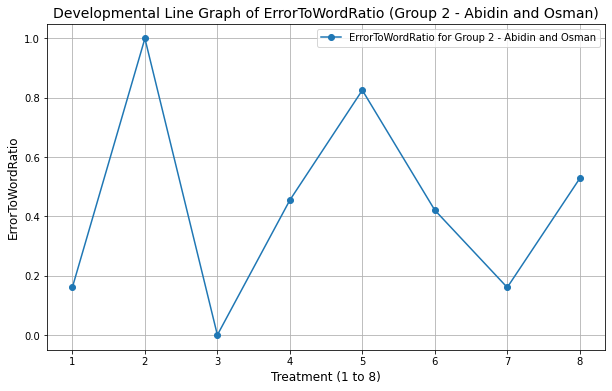

Figure 4. Developmental Line Graph of MLS for Group 2 - Aleyna and Ceren


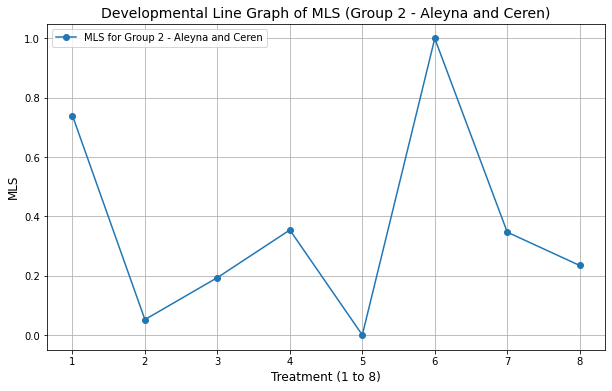

Figure 5. Developmental Line Graph of CN_C for Group 2 - Aleyna and Ceren


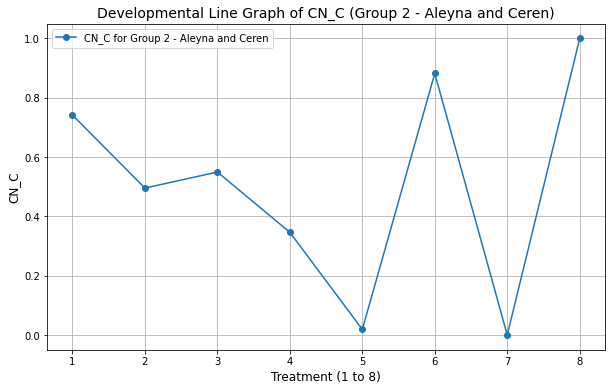

Figure 6. Developmental Line Graph of ErrorToWordRatio for Group 2 - Aleyna and Ceren


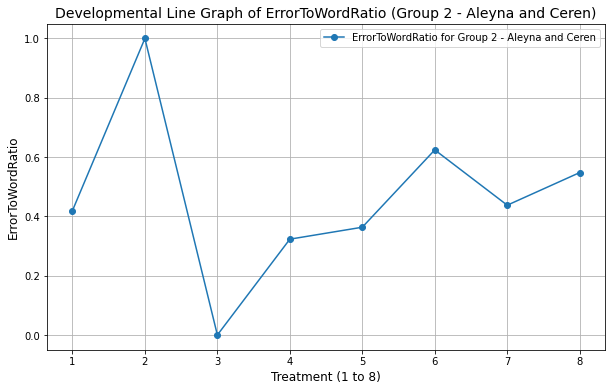

Figure 7. Developmental Line Graph of MLS for Group 2 - Ayse and Halime


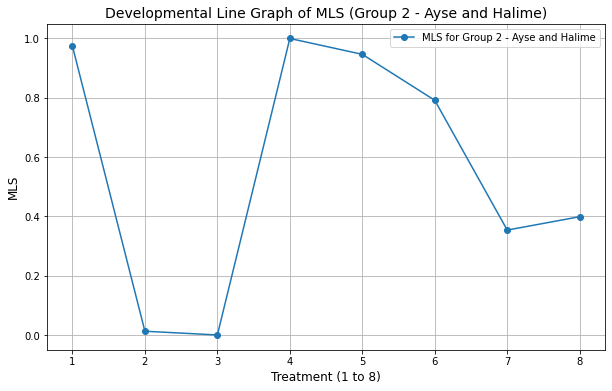

Figure 8. Developmental Line Graph of CN_C for Group 2 - Ayse and Halime


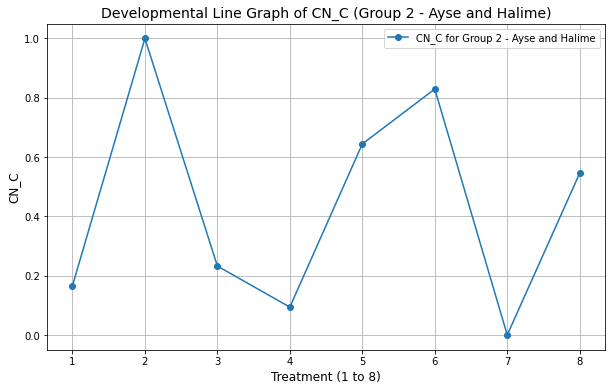

Figure 9. Developmental Line Graph of ErrorToWordRatio for Group 2 - Ayse and Halime


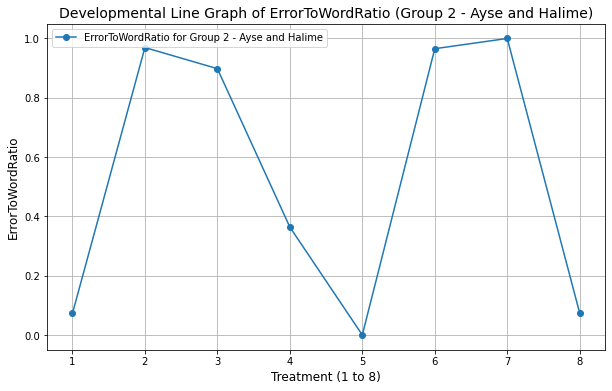

Figure 10. Developmental Line Graph of MLS for Group 2 - Beyza and Umur


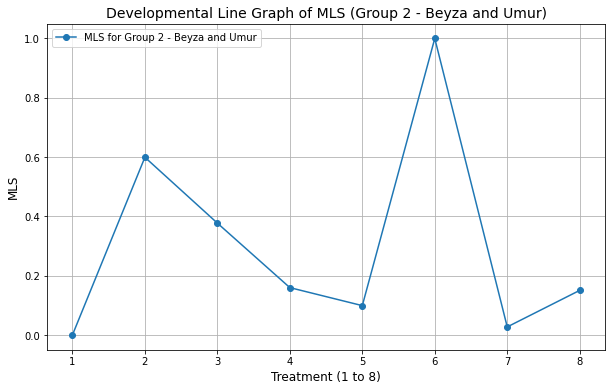

Figure 11. Developmental Line Graph of CN_C for Group 2 - Beyza and Umur


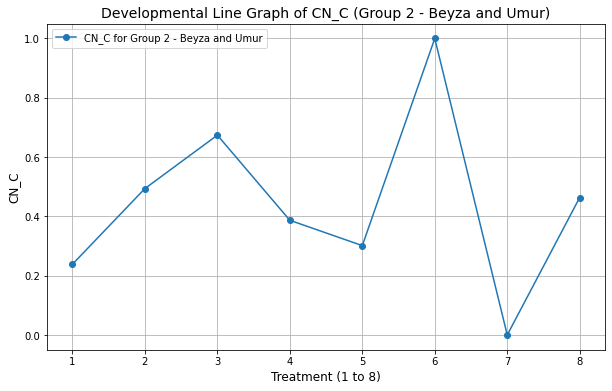

Figure 12. Developmental Line Graph of ErrorToWordRatio for Group 2 - Beyza and Umur


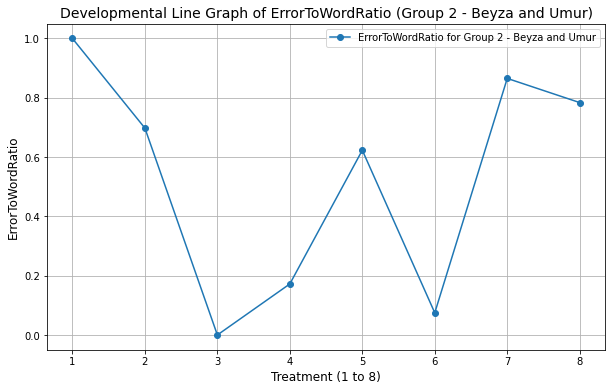

Figure 13. Developmental Line Graph of MLS for Group 2 - Ceren and Mihriban


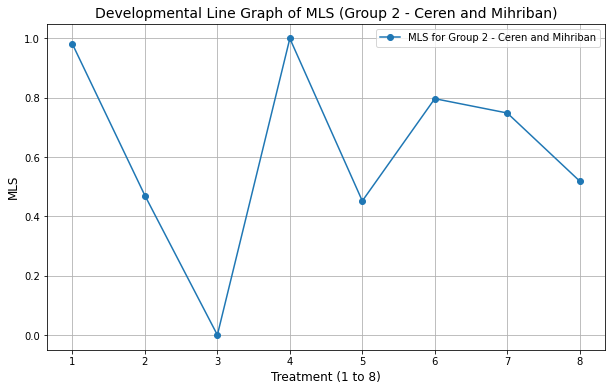

Figure 14. Developmental Line Graph of CN_C for Group 2 - Ceren and Mihriban


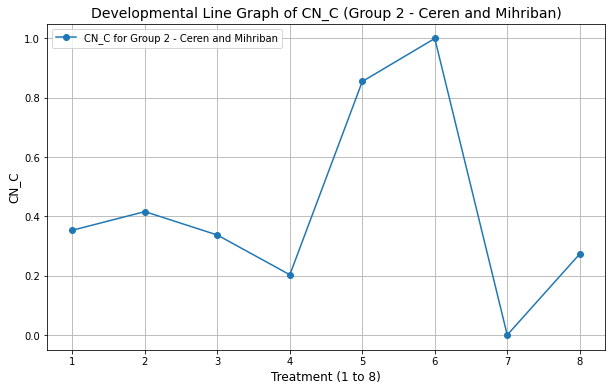

Figure 15. Developmental Line Graph of ErrorToWordRatio for Group 2 - Ceren and Mihriban


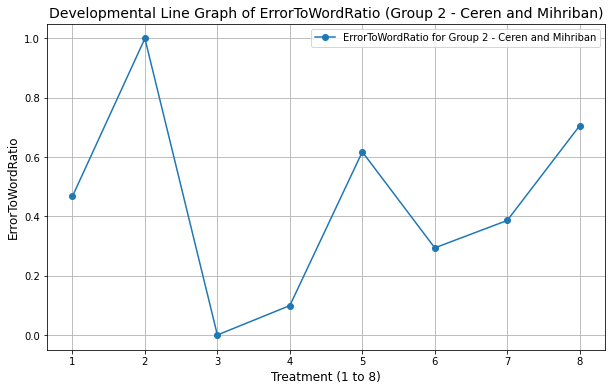

Figure 16. Developmental Line Graph of MLS for Group 2 - Damla and Sumeyye


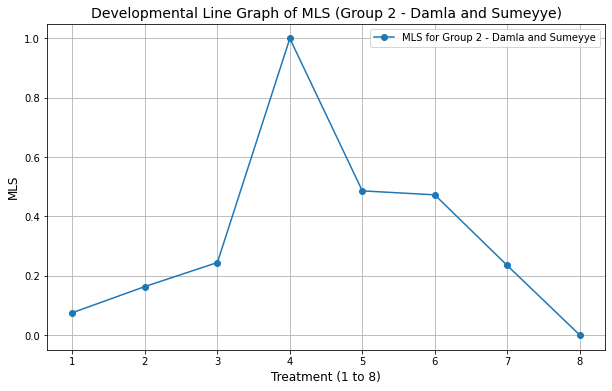

Figure 17. Developmental Line Graph of CN_C for Group 2 - Damla and Sumeyye


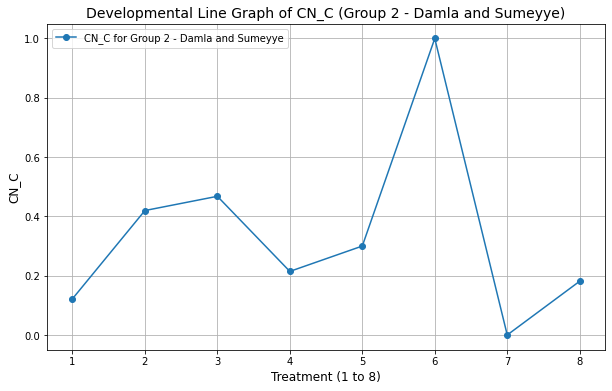

Figure 18. Developmental Line Graph of ErrorToWordRatio for Group 2 - Damla and Sumeyye


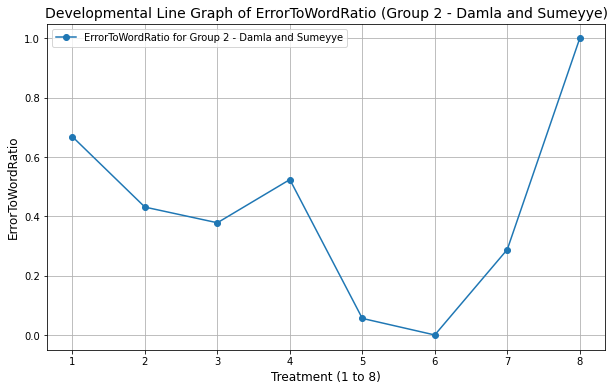

Figure 19. Developmental Line Graph of MLS for Group 2 - Fadime and Sura


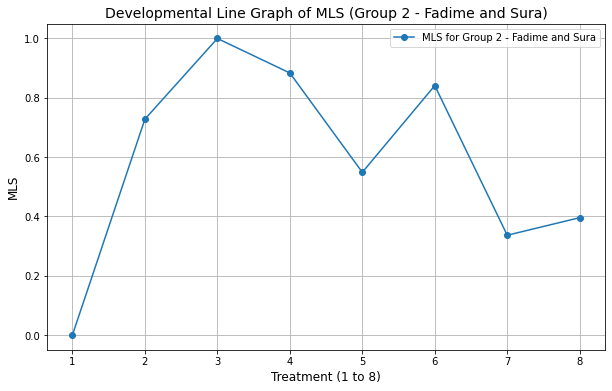

Figure 20. Developmental Line Graph of CN_C for Group 2 - Fadime and Sura


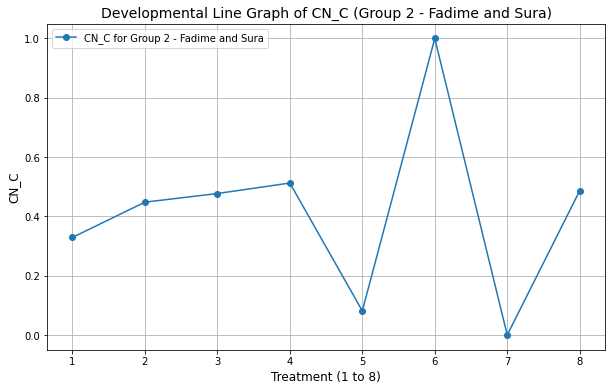

Figure 21. Developmental Line Graph of ErrorToWordRatio for Group 2 - Fadime and Sura


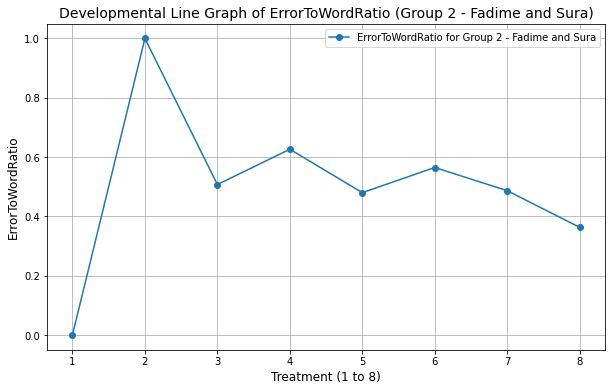

Figure 22. Developmental Line Graph of MLS for Group 2 - Fatma and Eren


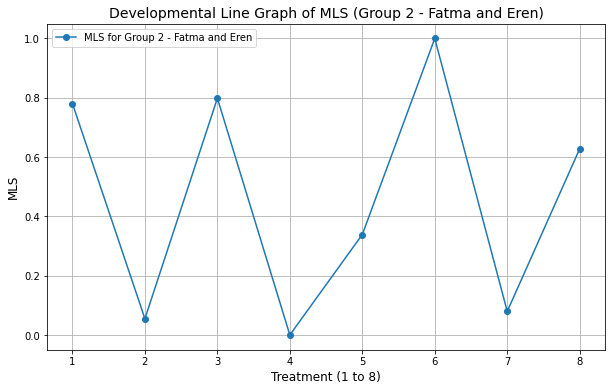

Figure 23. Developmental Line Graph of CN_C for Group 2 - Fatma and Eren


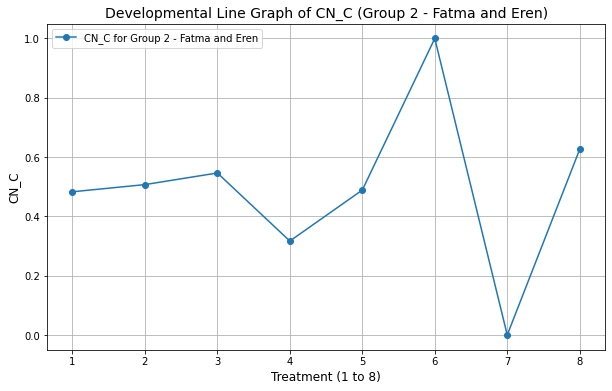

Figure 24. Developmental Line Graph of ErrorToWordRatio for Group 2 - Fatma and Eren


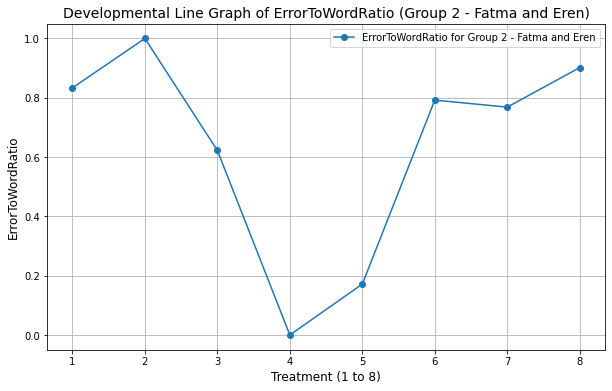

Figure 25. Developmental Line Graph of MLS for Group 2 - Songul and Esma


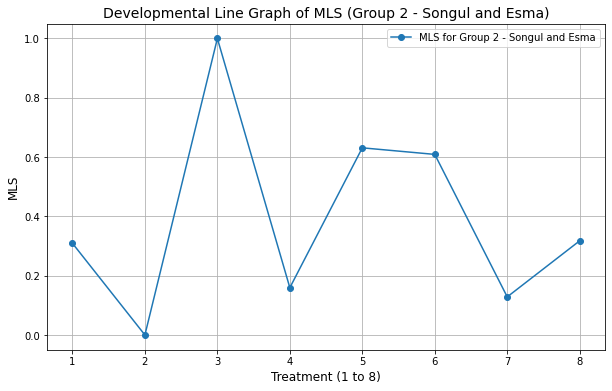

Figure 26. Developmental Line Graph of CN_C for Group 2 - Songul and Esma


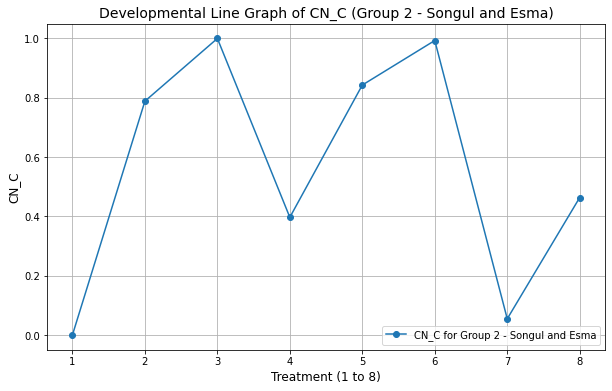

Figure 27. Developmental Line Graph of ErrorToWordRatio for Group 2 - Songul and Esma


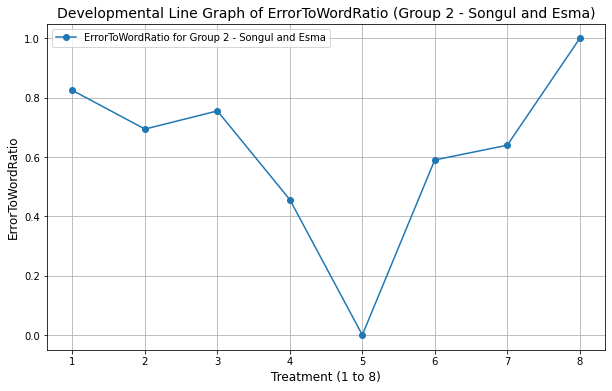

Figure 28. Developmental Line Graph of MLS for Group 2 - Zeynep and Elif


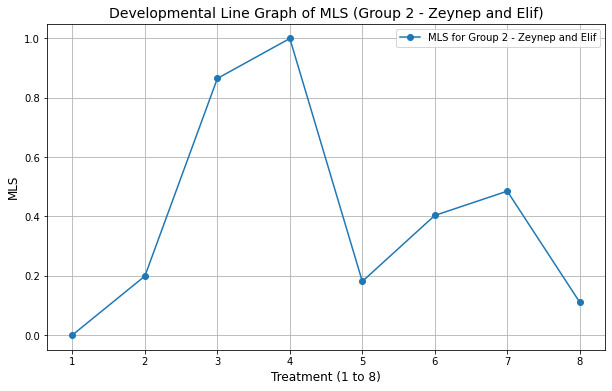

Figure 29. Developmental Line Graph of CN_C for Group 2 - Zeynep and Elif


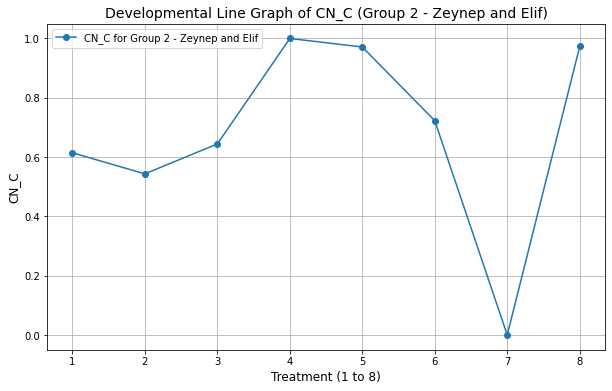

Figure 30. Developmental Line Graph of ErrorToWordRatio for Group 2 - Zeynep and Elif


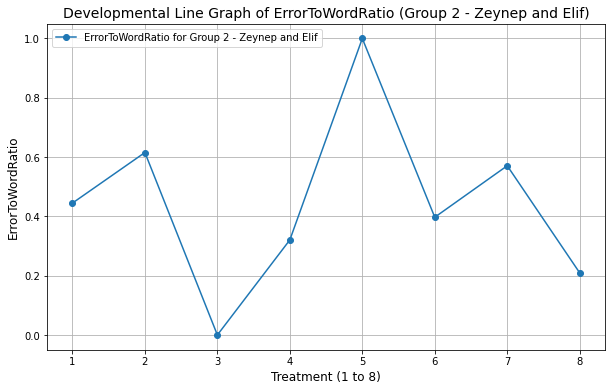

In [13]:
# Updated list of G1 peer group names for better display
g2_names_display = [
    'Group 2 - Abidin and Osman', 'Group 2 - Aleyna and Ceren', 'Group 2 - Ayse and Halime',
    'Group 2 - Beyza and Umur', 'Group 2 - Ceren and Mihriban', 'Group 2 - Damla and Sumeyye',
    'Group 2 - Fadime and Sura', 'Group 2 - Fatma and Eren', 'Group 2 - Songul and Esma', 
    'Group 2 - Zeynep and Elif'
]

# Starting figure number
figure_number = 1

# Loop through all G1 dataframes and plot separate graphs for MLS, CN_C, and ErrorToWordRatio for each
for df, name_display in zip(g2_dataframes_detrended, g2_names_display):
    treatments = range(1, 9)
    
    # Plot MLS for each treatment
    print(f"Figure {figure_number}. Developmental Line Graph of MLS for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    plt.plot(treatments, df['MLS'], marker='o', linestyle='-', label=f'MLS for {name_display}')
    plt.title(f'Developmental Line Graph of MLS ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('MLS', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot CN_C for each treatment
    print(f"Figure {figure_number}. Developmental Line Graph of CN_C for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    plt.plot(treatments, df['CN_C'], marker='o', linestyle='-', label=f'CN_C for {name_display}')
    plt.title(f'Developmental Line Graph of CN_C ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('CN_C', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ErrorToWordRatio for each treatment
    print(f"Figure {figure_number}. Developmental Line Graph of ErrorToWordRatio for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    plt.plot(treatments, df['ErrorToWordRatio'], marker='o', linestyle='-', label=f'ErrorToWordRatio for {name_display}')
    plt.title(f'Developmental Line Graph of ErrorToWordRatio ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('ErrorToWordRatio', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()
